In [1]:
import imports as i
import functions as f
import preprocessing as pp
import neuralnetworks as nn 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MUSIC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\MUSIC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [113]:
PATH = {}
PATH["dataset_classification"] = "dataset/classification/"
PATH["dataset_labeling"] = "dataset/seq_labeling/"
PATH["music_reviews_train"] = PATH["dataset_classification"] + "music_reviews_train.json.gz"
PATH["music_reviews_dev"] = PATH["dataset_classification"] + "music_reviews_dev.json.gz"
PATH["music_reviews_test"] = PATH["dataset_classification"] + "music_reviews_test_masked.json.gz"
train = f.readJson(PATH["music_reviews_train"])
test = f.readJson(PATH["music_reviews_dev"])

Number of data:  100000
Number of data:  10000


In [121]:
X_train, y_train, train_idx, train_missing_idx = f.json_divide(train)
X_test, y_test, test_idx, test_missing_idx = f.json_divide(test)

# convert labels
sent_dict = {"positive": 1, "negative": 0}
y_train = pp.sentiment_converter(y_train, sent_dict)
y_test = pp.sentiment_converter(y_test, sent_dict)

In [122]:
# hack
end = 1000
start = 100
X_train = X_train[start:end+start]
y_train = y_train[start:end+start]
X_test = X_test[start:end+start]
y_test = y_test[start:end+start]

## PREPROCESSING FUNCTIONS

In [116]:
# simplyfy contractions
train_set_clean = f.simplify_contraction(X_train)
test_set_clean = f.simplify_contraction(X_test)

# BASIC PREPROCESSING
train_set_clean = pp.basic_preprocess(train_set_clean)
test_set_clean = pp.basic_preprocess(test_set_clean)

# GRAMMAR CORRECTOR 
train_set_clean = pp.grammar_corrector(train_set_clean)
test_set_clean  = pp.grammar_corrector(test_set_clean)

# lemmattize 
train_set_clean = pp.lemmatize_sentencelist(train_set_clean)
test_set_clean = pp.lemmatize_sentencelist(test_set_clean)

# REMOVE STOP WORDS
train_set_clean = pp.remove_stop_words(train_set_clean)
test_set_clean = pp.remove_stop_words(test_set_clean)

## Neural Network INIT

In [89]:

# Tokenizer
tokenizer = pp.tokenizer_init(train_set_clean, test_set_clean)
Train = tokenizer.texts_to_sequences(train_set_clean)
Test = tokenizer.texts_to_sequences(test_set_clean)
# Sequencer 
X_train_p = pp.sequence_pad(Train) # there are several attributes which can be defined, basic = first 50 words 
X_test_p = pp.sequence_pad(Test)

# Train RNN with Early stopping

In [90]:
# TRAIN 
history, model = nn.RNN_train(X_train_p, y_train, X_test_p, y_test, tokenizer)
# model is the model 

Epoch 1/10
18/18 [==============================] - 5s 115ms/step - loss: 1.0422 - accuracy: 0.5089 - val_loss: 0.7062 - val_accuracy: 0.5722 - lr: 0.0010
Epoch 2/10
18/18 [==============================] - ETA: 0s - loss: 0.6636 - accuracy: 0.5511
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
18/18 [==============================] - 2s 90ms/step - loss: 0.6636 - accuracy: 0.5511 - val_loss: 0.6794 - val_accuracy: 0.5889 - lr: 0.0010
Epoch 3/10
18/18 [==============================] - ETA: 0s - loss: 0.6277 - accuracy: 0.6833
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
18/18 [==============================] - 2s 88ms/step - loss: 0.6277 - accuracy: 0.6833 - val_loss: 0.6797 - val_accuracy: 0.5900 - lr: 2.0000e-04
Epoch 4/10
18/18 [==============================] - ETA: 0s - loss: 0.6170 - accuracy: 0.6922Restoring model weights from the end of the best epoch: 3.

Epoch 4: ReduceLROnPlateau reducing learning rate to 8.00000

0.5966666666666667


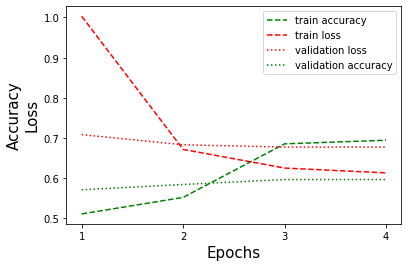

In [87]:
# accuracy score
result = i.np.round(model.predict(X_test)) # use model from the previous step
print(i.accuracy_score(y_test, result))
# plotting 
f.plot_model_history(history)

# POS-tagger

In [ ]:
# https://www.nltk.org/api/nltk.tag.html
from nltk import pos_tag, word_tokenize
nltk.download('averaged_perceptron_tagger')

#only works for english
def pos_tag_stringlist(strlist, shouldTokenize):
    pos_tagged_strlist = []
    if shouldTokenize: 
        for str in strlist: pos_tagged_strlist.append(pos_tag(word_tokenize(str)))
    else: 
        for str in strlist: pos_tagged_strlist.append(pos_tag(str))
    return pos_tagged_strlist

# STEPS

In [ ]:
# define the two model
### baseline, Hugging Face

In [ ]:
# LOG the results in pandas Dataframe

In [2]:
# STEPS ORDER for Preprocessing
# 1. Basic preprocessing - Should be the first step
# 2. Grammar Correction
# 3. Simplify Contractions
# 4. Lemmatize 
# 5. Remove stop words

In [17]:
# TODO: 
# 2. Define the technical parameters of the basic NN
## post tagging 
## 10k same sentence 
## first 50 word
## 
#### BASE RNN vs Hugging Face 
# simple pandas dataframe - Columns are preproc methods, 1,0,1, accuracy, etc  
# 4. Best vs Worst Accuracy settings test on bigger corpus # Bigger test, Train? Dev set ?

In [18]:
# Grid search

In [123]:
def grid_search(train_list, test_list, y_train, y_test):
    simp_contr = [0, 1]
    gram_cor = [0, 1]
    simp_neg = [0, 1]
    lemma = [0, 1]
    rem_stop = [0, 1]
    list_of_data = []
    for z in simp_contr:
        for x in gram_cor:
            for c in simp_neg:
                for v in lemma:
                    for b in rem_stop:
                        train = train_list
                        test = test_list
                        if z == 1: # contractions
                            train = f.simplify_contraction(train)
                            test = f.simplify_contraction(test)
                        #train = pp.basic_preprocess(train)
                        #test = pp.basic_preprocess(test)
                        if x == 1: # grammar correction 
                            train = train #pp.grammar_corrector(train)
                            test = test #pp.grammar_corrector(test)
                        if c == 1: # Simnplyfy Negotiation 
                            train = f.simplify_negation(train)
                            test = f.simplify_negation(test)
                        if v == 1: # Lemmatize 
                            train = f.lemmatize_sentencelist(train)
                            test = f.lemmatize_sentencelist(test)
                        if b == 1: # Remove stop words
                            train = pp.remove_stop_words(train)
                            test = pp.remove_stop_words(test)
                        list_of_data.append([[z, x, c, v, b], train, test])
    return list_of_data, y_train, y_test

In [124]:
data_sets, y_train, y_test = grid_search(X_train, X_test, y_train, y_test)

In [ ]:
results = pd.DataFrame(columns=['c', 'a'])

In [134]:
columns = ["Running ID", "Model Name", "Simplify Contractions", "Basic Preprocessing", "Grammar Correction", "Lemmatize", "Remove Stop Words", "No. of Sentences", "Train Accuracy STOP", "Test Accuracy STOP", "Train Loss STOP", "Test Loss STOP"]
results = i.pd.DataFrame(columns=columns)

AttributeError: module 'imports' has no attribute 'pd'

In [131]:
best_result = [[], 0]
for data_set in data_sets:
    # Tokenizer
    print("##### Combination\n: ", data_set[0])
    tokenizer = pp.tokenizer_init(data_set[1], data_set[2])
    Train = tokenizer.texts_to_sequences(data_set[1])
    Test = tokenizer.texts_to_sequences(data_set[2])
        # Sequencer 
    X_train_p = pp.sequence_pad(Train) # there are several attributes which can be defined, basic = first 50 words 
    X_test_p = pp.sequence_pad(Test)
        
        # TRAIN
    #print("shapes: ", X_train_p.shape, X_test_p.shape)
    history, model = nn.RNN_train(X_train_p, y_train, X_test_p, y_test, tokenizer)
        
        # accuracy score
    #result = i.np.round(model.predict(data_set[1])) # use model from the previous step
    #print("#### Accuracy: ", result)
'''        if result[1] > best_result[1]:
            best_result = [data_set[0], result]
    return best_result'''

##### Combination
:  [0, 0, 0, 0, 0]
Epoch 1/10
20/20 [==============================] - 4s 135ms/step - loss: 1.0902 - accuracy: 0.5130 - val_loss: 0.7706 - val_accuracy: 0.5820 - lr: 0.0010
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.6441 - accuracy: 0.5980
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 3s 131ms/step - loss: 0.6441 - accuracy: 0.5980 - val_loss: 0.6673 - val_accuracy: 0.6010 - lr: 0.0010
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.5909 - accuracy: 0.7960
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 2s 126ms/step - loss: 0.5909 - accuracy: 0.7960 - val_loss: 0.6606 - val_accuracy: 0.6140 - lr: 2.0000e-04
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.5777 - accuracy: 0.7950
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/2

Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.6145 - accuracy: 0.6040
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 3s 147ms/step - loss: 0.6145 - accuracy: 0.6040 - val_loss: 0.6911 - val_accuracy: 0.5760 - lr: 2.0000e-04
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.5980 - accuracy: 0.6670Restoring model weights from the end of the best epoch: 3.

Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [==============================] - 3s 133ms/step - loss: 0.5980 - accuracy: 0.6670 - val_loss: 0.6894 - val_accuracy: 0.5760 - lr: 4.0000e-05
Epoch 4: early stopping
##### Combination
:  [0, 1, 0, 0, 0]
Epoch 1/10
20/20 [==============================] - 5s 144ms/step - loss: 1.0918 - accuracy: 0.5200 - val_loss: 0.7669 - val_accuracy: 0.5830 - lr: 0.0010
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.6567 - accuracy: 0

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x000001ED0E056160>
Traceback (most recent call last):
  File "c:\users\music\appdata\local\programs\python\python39\lib\weakref.py", line 368, in remove
    self = selfref()
KeyboardInterrupt: 


20/20 [==============================] - 14s 191ms/step - loss: 1.6346 - accuracy: 0.5170 - val_loss: 0.7025 - val_accuracy: 0.5700 - lr: 0.0010
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.6599 - accuracy: 0.5450
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 3s 160ms/step - loss: 0.6599 - accuracy: 0.5450 - val_loss: 0.6778 - val_accuracy: 0.5760 - lr: 0.0010
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.6075 - accuracy: 0.7050
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
20/20 [==============================] - 3s 161ms/step - loss: 0.6075 - accuracy: 0.7050 - val_loss: 0.6746 - val_accuracy: 0.5820 - lr: 2.0000e-04
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.5928 - accuracy: 0.7240
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [==============================] - 3s 161ms/s

Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.5835 - accuracy: 0.7120Restoring model weights from the end of the best epoch: 3.

Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [==============================] - 3s 152ms/step - loss: 0.5835 - accuracy: 0.7120 - val_loss: 0.6756 - val_accuracy: 0.5890 - lr: 4.0000e-05
Epoch 4: early stopping
##### Combination
:  [1, 0, 0, 1, 0]
Epoch 1/10
20/20 [==============================] - 6s 183ms/step - loss: 1.5004 - accuracy: 0.5230 - val_loss: 0.7185 - val_accuracy: 0.5890 - lr: 0.0010
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.6451 - accuracy: 0.5600
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
20/20 [==============================] - 3s 157ms/step - loss: 0.6451 - accuracy: 0.5600 - val_loss: 0.6698 - val_accuracy: 0.5910 - lr: 0.0010
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.5971 - accuracy: 0.682

20/20 [==============================] - ETA: 0s - loss: 0.5271 - accuracy: 0.8010
Epoch 4: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
20/20 [==============================] - 4s 190ms/step - loss: 0.5271 - accuracy: 0.8010 - val_loss: 0.6461 - val_accuracy: 0.6420 - lr: 4.0000e-05
Epoch 5/10
20/20 [==============================] - ETA: 0s - loss: 0.5180 - accuracy: 0.8000Restoring model weights from the end of the best epoch: 4.

Epoch 5: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
20/20 [==============================] - 4s 217ms/step - loss: 0.5180 - accuracy: 0.8000 - val_loss: 0.6451 - val_accuracy: 0.6420 - lr: 8.0000e-06
Epoch 5: early stopping
##### Combination
:  [1, 1, 0, 1, 1]
Epoch 1/10
20/20 [==============================] - 9s 298ms/step - loss: 1.0819 - accuracy: 0.5030 - val_loss: 0.7720 - val_accuracy: 0.5730 - lr: 0.0010
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.6766 - accuracy: 0.5400
Epoch

'        if result[1] > best_result[1]:\n            best_result = [data_set[0], result]\n    return best_result'